# LINK FOR GEOPANDAS:
https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391

# SHAPEFILES:
https://data.humdata.org/dataset/nepal-municipalities
https://geodata.lib.berkeley.edu/catalog/sde-columbia-iscgm_nepal_2008_polbndl

In [1]:
import pandas as pd

In [2]:
buildings = pd.read_csv('csv_building_structure.csv')
names = pd.read_csv('ward_vdcmun_district_name_mapping.csv')

In [3]:
buildings.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [4]:
names.head()

,ward_id,vdcmun_id,vdcmun_name,district_id,district_name
0,120101,1201,Champadevi Rural Municipality,12,Okhaldhunga
1,120102,1201,Champadevi Rural Municipality,12,Okhaldhunga
2,120103,1201,Champadevi Rural Municipality,12,Okhaldhunga
3,120104,1201,Champadevi Rural Municipality,12,Okhaldhunga
4,120105,1201,Champadevi Rural Municipality,12,Okhaldhunga


In [5]:
df = buildings.merge(names, left_on = ['district_id', 'vdcmun_id', 'ward_id'], right_on = ['district_id', 'vdcmun_id', 'ward_id'])

In [6]:
df[['building_id','district_id','vdcmun_id']]

,building_id,district_id,vdcmun_id
0,120101000011,12,1207
1,120101000021,12,1207
2,120101000031,12,1207
3,120101000041,12,1207
4,120101000051,12,1207
...,...,...,...
762101,366705001261,36,3603
762102,366705001271,36,3603
762103,366705001281,36,3603
762104,366705001291,36,3603


In [7]:
df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed',
       'vdcmun_name', 'district_name'],
      dtype='object')

In [8]:
# df.to_csv('location_names')

In [9]:
df.district_id.unique()

array([12, 20, 21, 22, 23, 24, 28, 29, 30, 31, 36])

In [10]:
len(df.ward_id)

762106

In [11]:
df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed',
       'vdcmun_name', 'district_name'],
      dtype='object')

In [12]:
# need to dropna() to simplify data-cleaning

df = df.dropna()

df

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,vdcmun_name,district_name
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair,Siddhicharan Municipality,Okhaldhunga
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction,Siddhicharan Municipality,Okhaldhunga
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,Siddhicharan Municipality,Okhaldhunga
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,Siddhicharan Municipality,Okhaldhunga
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair,Siddhicharan Municipality,Okhaldhunga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366705001261,36,3603,360301,2,0,12,430,12,0,...,1,0,0,0,0,Damaged-Rubble Clear-New building built,Grade 5,Reconstruction,Barpak Sulikot Rural Municipality,Gorkha
762102,366705001271,36,3603,360301,2,0,25,420,12,0,...,1,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction,Barpak Sulikot Rural Municipality,Gorkha
762103,366705001281,36,3603,360301,2,0,45,408,12,0,...,1,0,0,0,0,Damaged-Rubble unclear,Grade 5,Reconstruction,Barpak Sulikot Rural Municipality,Gorkha
762104,366705001291,36,3603,360301,2,0,4,493,12,0,...,1,0,0,0,0,Damaged-Rubble unclear,Grade 5,Reconstruction,Barpak Sulikot Rural Municipality,Gorkha


In [13]:
len(df.vdcmun_name.unique())

106

In [14]:
!pip install geopy

In [16]:
coordinate_list = []

from geopy.geocoders import Nominatim
for name in list(df['vdcmun_name'].unique()):
    geolocator = Nominatim(user_agent='msba')
    location = geolocator.geocode(name)
    if len(str(type(location))) > 18: # some locations cannot be automatically recognized and must be manually entered in later
        coordinate_list.append([location.latitude, location.longitude])

In [17]:
# getting the list of municipality names that can be plotted automatically

mun_names_list = []
for name in list(df['vdcmun_name'].unique()):
    geolocator = Nominatim(user_agent='msba')
    location = geolocator.geocode(name)
    if len(str(type(location))) > 18: # some locations cannot be automatically recognized and must be manually entered in later
        mun_names_list.append(name)

mun_names_list

['Sunkoshi Rural Municipality',
 'Manebhanjyang Rural Municipality',
 'Molung Rural Municipality',
 'Likhu Rural Municipality',
 'Kamalamai Municipality',
 'Marin Rural Municipality',
 'Phikkal Rural Municipality',
 'Bigu Rural Municipality',
 'Kalinchowk Rural Municipality',
 'Bhimeshwor Municipality',
 'Gaurishankar Rural Municipality',
 'Jiri Municipality',
 'Jugal Rural Municipality',
 'Tripurasundari Rural Municipality',
 'Panauti Municipality',
 'Roshi Rural Municipality',
 'Mahabharat Rural Municipality',
 'Banepa Municipality',
 'Dhulikhel Municipality',
 'Panchakanya Rural Municipality',
 'Bidur Municipality',
 'Tarakeshwor Rural Municipality',
 'Tadi Rural Municipality',
 'Kalika Rural Municipality',
 'Gosaikunda Rural Municipality',
 'Jwalamukhi Rural Municipality',
 'Thaha Municipality',
 'Bagmati Rural Municipality',
 'Kailash Rural Municipality',
 'Manahari Rural Municipality',
 'Aarughat Rural Municipality',
 'Gandaki Rural Municipality',
 'Gorkha Municipality',
 'Ajirko

In [18]:
coordinate_list

[[27.4066929, 85.9004472],
 [27.2131922, 86.4451299],
 [27.35783055, 86.42705411965261],
 [27.3835312, 86.2444275],
 [27.167088649999997, 85.86026037165439],
 [27.2644204, 85.7328828],
 [26.8956801, 88.065698],
 [27.8402896, 86.0528997345248],
 [27.66419505, 86.05076337746229],
 [27.6650855, 86.0493314367946],
 [27.0967866, 86.0458969],
 [27.6369007, 86.0651877],
 [28.0197239, 85.7843038],
 [27.7689843, 85.9543414],
 [27.5905828, 85.50702049791184],
 [42.4521434, 21.4664891],
 [27.2110102, 85.9137966],
 [27.6298503, 85.52032400191217],
 [27.6001049, 85.5764575],
 [27.776593849999998, 85.35390445023086],
 [27.9114128, 85.1412721],
 [27.7646345, 85.3008662],
 [-25.7268855, 28.4211796],
 [28.2560679, 83.7914123],
 [28.1118914, 85.2956347],
 [27.9115092, 84.8841755],
 [-25.4419753, 28.1272166],
 [27.8402896, 86.0528997345248],
 [27.13642075, 87.23277313795734],
 [27.4504976, 84.9150431],
 [27.9292083, 84.8621389],
 [28.3017635, 83.68381426783505],
 [27.986618550000003, 84.62330984437688],


In [19]:
# now must manually add in the remaining municipalities

man_names_list = list(df.vdcmun_name.unique())

for name in mun_names_list:
    man_names_list.remove(name)
    
man_names_list

['Siddhicharan Municipality',
 'Champadevi Rural Municipality',
 'Khiji Demba Rural Municipality',
 'Chishankhu Gadhi Rural Municipality',
 'Ghyanglekha Rural Municipality',
 'Tinpatan Rural Municipality',
 'Dudhouli Municipality',
 'Golanjor Rural Municipality',
 'Hariharpurgaghi Rural Municipality',
 'Umakunda Rural Municipality',
 'Gokulganga Rural Municipality',
 'Sunapati Rural Municipality',
 'Khandadevi Rural Municipality',
 'Manthali  Municipality',
 'Likhu Tamakoshi Rural Municipality',
 'Doramba Rural Municipality',
 'Ramechhap Municipality',
 'Melung Rural Municipality',
 'Tamakoshi Rural Municipality',
 'Shailung Rural Municipality',
 'Baitedhar Rural Municipality',
 'Lisankhu Pakhar Rural Municipality',
 'Indrawoti Rural Municipality',
 'Melanchi Municipality',
 'Panchpokhari Thangpal Rural Municipality',
 'Balephi Rural Municipality',
 'Choutara Sangachowkgadhi Municipality',
 'Bahrabise Municipality',
 'Bhotekoshi Rural Municipality',
 'Helambu Rural Municipality',
 'Pan

In [20]:
for name in man_names_list:
    mun_names_list.append(name)

In [21]:
coordinate_list.append([27.3065, 86.5146]) # Siddhicharan
coordinate_list.append([27.3218, 86.3083]) # Champadevi
coordinate_list.append([27.4556, 86.3642]) # Khiji Demba
coordinate_list.append([27.3038, 86.6142]) # Chishankhu Gadhi
coordinate_list.append([27.3210, 85.9960]) # Ghyanglekha
coordinate_list.append([27.1377, 86.1338]) # Tinpatan
coordinate_list.append([27.0276, 86.2526]) # Dudhouli
coordinate_list.append([27.2458, 86.069]) # Golanjor
coordinate_list.append([27.3367, 85.4863]) # Hariharpurgaghi
coordinate_list.append([27.9434, 93.6590]) # Umakunda
coordinate_list.append([29.0893, 91.3371]) # Gokulganga
coordinate_list.append([30.9136, 85.4212]) # Khandadevi
coordinate_list.append([27.5499, 86.0981]) # Likhu Tamakoshi
coordinate_list.append([27.5396, 85.9228]) # Doramba
coordinate_list.append([27.5396, 86.0422]) # Melung
coordinate_list.append([27.6422, 86.1181]) # Baitedhar
coordinate_list.append([27.8090, 85.6205]) # Indrawoti
coordinate_list.append([27.8241, 85.5873]) # Melanchi
coordinate_list.append([27.7805, 85.7122]) # Choutara Sangachowkgadhi
coordinate_list.append([27.6622, 85.6122]) # Panchkhal
coordinate_list.append([27.7111, 85.6154]) # Mandan Deupur
coordinate_list.append([27.6154, 85.7530]) # Bhumlu
coordinate_list.append([27.5916, 85.7850]) # Chauri Deurali
coordinate_list.append([27.5205, 85.7366]) # Temal
coordinate_list.append([27.5224, 85.4791]) # Bethanchowk
coordinate_list.append([27.5297, 85.4921]) # Khanikhola
coordinate_list.append([27.5523, 85.6358]) # Namobuddha
coordinate_list.append([28.1522, 84.1885]) # Myagang
coordinate_list.append([27.9151, 85.0310]) # Tarakeshwor 
coordinate_list.append([28.1716, 85.3153]) # Aamachhodingmo
coordinate_list.append([27.7190, 85.1600]) # Dhunibenshi
coordinate_list.append([27.817, 84.783]) # Khaniyabas
coordinate_list.append([27.9160, 84.9167]) # Neelakantha
coordinate_list.append([27.9827, 84.9962]) # Netrawati Dabajong
coordinate_list.append([28.0360, 84.7171]) # Bhimsen Thapa
coordinate_list.append([27.9270, 84.6584]) # Shahid Lakhan
coordinate_list.append([28.5182, 84.8462]) # Chumanubri
coordinate_list.append([28.0527, 84.5894]) # Siranchowk


In [22]:
latitude_list = []
longitude_list = []

for item in coordinate_list:
    latitude_list.append(item[0])
    longitude_list.append(item[1])

latitude_list

[27.4066929,
 27.2131922,
 27.35783055,
 27.3835312,
 27.167088649999997,
 27.2644204,
 26.8956801,
 27.8402896,
 27.66419505,
 27.6650855,
 27.0967866,
 27.6369007,
 28.0197239,
 27.7689843,
 27.5905828,
 42.4521434,
 27.2110102,
 27.6298503,
 27.6001049,
 27.776593849999998,
 27.9114128,
 27.7646345,
 -25.7268855,
 28.2560679,
 28.1118914,
 27.9115092,
 -25.4419753,
 27.8402896,
 27.13642075,
 27.4504976,
 27.9292083,
 28.3017635,
 27.986618550000003,
 28.1580593,
 27.3065,
 27.3218,
 27.4556,
 27.3038,
 27.321,
 27.1377,
 27.0276,
 27.2458,
 27.3367,
 27.9434,
 29.0893,
 30.9136,
 27.5499,
 27.5396,
 27.5396,
 27.6422,
 27.809,
 27.8241,
 27.7805,
 27.6622,
 27.7111,
 27.6154,
 27.5916,
 27.5205,
 27.5224,
 27.5297,
 27.5523,
 28.1522,
 27.9151,
 28.1716,
 27.719,
 27.817,
 27.916,
 27.9827,
 28.036,
 27.927,
 28.5182,
 28.0527]

In [23]:
latitude_df = pd.Series(latitude_list)
longitude_df = pd.Series(longitude_list)
municipality_df = pd.Series(mun_names_list)

In [24]:
# convert damage_grade to numbers
def take_last_int(s):
    s = str(s)
    s = s.split()
    return s[-1]

df['damage_grade_int'] = df['damage_grade'].map(take_last_int)

df['damage_grade_int'] = pd.to_numeric(df['damage_grade_int'])

In [25]:
df['sum wood structure'] = df['has_superstructure_timber'] + df['has_superstructure_bamboo']

def has_wood(n):
    if n > 0:
        return 1
    else:
        return 0

df['has_wood_superstructure'] = df['sum wood structure'].apply(has_wood)

In [26]:
municipal_damage = df.groupby(['vdcmun_name'])[['damage_grade_int','age_building','has_wood_superstructure']].mean()

municipal_damage = municipal_damage.reset_index()

# municipal_damage_filtered = municipal_damage[municipal_damage['vdcmun_name'].isin(mun_names_list)].reset_index(drop=True)

In [51]:
num_B = df["vdcmun_name"].value_counts().sort_index(ascending=True).to_numpy()
num_B

array([32696, 17174, 15659, 15239, 15204, 15002, 14580, 13946, 13532,
       13107, 12285, 12045, 11726, 11180, 10999, 10796, 10719, 10519,
        9735,  8863,  8852,  8841,  8593,  8569,  8273,  8221,  8212,
        8121,  8017,  7901,  7881,  7778,  7527,  7401,  7302,  7255,
        7203,  7188,  7084,  7010,  7006,  6982,  6905,  6800,  6758,
        6661,  6532,  6480,  6461,  6392,  6292,  6281,  6277,  6241,
        6201,  6191,  6151,  6135,  6039,  6037,  5838,  5827,  5758,
        5732,  5717,  5660,  5625,  5516,  5405,  5293,  5277,  5236,
        5176,  5091,  4873,  4865,  4835,  4764,  4739,  4737,  4707,
        4663,  4637,  4573,  4560,  4476,  4438,  4243,  4175,  4122,
        4072,  3965,  3726,  3708,  3683,  3504,  3485,  3239,  3164,
        3032,  2750,  2746,  2611,  2589,  2224,  1981])

In [27]:
municipal_damage

,vdcmun_name,damage_grade_int,age_building,has_wood_superstructure
0,Aamachhodingmo Rural Municipality,4.267542,23.345280,0.877335
1,Aarughat Rural Municipality,4.351697,20.214663,0.187813
2,Ajirkot Rural Municipality,4.591617,22.717605,0.259641
3,Bagmati Rural Municipality,2.278523,56.072032,0.820500
4,Bahrabise Municipality,4.770229,22.272232,0.174171
...,...,...,...,...
101,Thakre Rural Municipality,4.025196,23.979169,0.279282
102,Tinpatan Rural Municipality,2.931739,13.005416,0.838655
103,Tripurasundari Rural Municipality,4.393470,36.657871,0.205009
104,Umakunda Rural Municipality,3.919516,20.196108,0.078594


In [28]:
coordinate_df = pd.concat([latitude_df,longitude_df,municipality_df],axis=1)

coordinate_df.columns = ['latitude','longitude','municipality']

In [29]:
coordinate_df = coordinate_df.sort_values(by='municipality',ascending=True)

In [30]:
coordinate_df = coordinate_df.reset_index(drop=True)

coordinate_df

,latitude,longitude,municipality
0,NaN,NaN,Aamachhodingmo Rural Municipality
1,27.929208,84.862139,Aarughat Rural Municipality
2,28.158059,84.649428,Ajirkot Rural Municipality
3,27.840290,86.052900,Bagmati Rural Municipality
4,28.152200,84.188500,Bahrabise Municipality
...,...,...,...
101,NaN,NaN,Thakre Rural Municipality
102,27.137700,86.133800,Tinpatan Rural Municipality
103,27.768984,85.954341,Tripurasundari Rural Municipality
104,27.943400,93.659000,Umakunda Rural Municipality


In [31]:
coordinate_df2 = pd.concat([coordinate_df,municipal_damage[['damage_grade_int','age_building','has_wood_superstructure']]],axis=1)

In [32]:
coordinate_df2.to_csv('partial coordinates.csv')

In [33]:
coordinate_df2

,latitude,longitude,municipality,damage_grade_int,age_building,has_wood_superstructure
0,NaN,NaN,Aamachhodingmo Rural Municipality,4.267542,23.345280,0.877335
1,27.929208,84.862139,Aarughat Rural Municipality,4.351697,20.214663,0.187813
2,28.158059,84.649428,Ajirkot Rural Municipality,4.591617,22.717605,0.259641
3,27.840290,86.052900,Bagmati Rural Municipality,2.278523,56.072032,0.820500
4,28.152200,84.188500,Bahrabise Municipality,4.770229,22.272232,0.174171
...,...,...,...,...,...,...
101,NaN,NaN,Thakre Rural Municipality,4.025196,23.979169,0.279282
102,27.137700,86.133800,Tinpatan Rural Municipality,2.931739,13.005416,0.838655
103,27.768984,85.954341,Tripurasundari Rural Municipality,4.393470,36.657871,0.205009
104,27.943400,93.659000,Umakunda Rural Municipality,3.919516,20.196108,0.078594


In [37]:
# !pip install pyproj

In [38]:
# !brew install geos
# !pip3 install https://github.com/matplotlib/basemap/archive/master.zip


In [39]:
# !pip install --upgrade pi

In [40]:
# !sudo apt-get install libgeos-3.5.0
# !sudo apt-get install libgeos-dev
# !pip install https://github.com/matplotlib/basemap/archive/master.zip

In [42]:
# !pip uninstall geopandas

# !pip install geopandas

In [43]:
# !pip uninstall shapely

# !pip install shapely --no-binary shapely

In [52]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# import street map
nepal = gpd.read_file('/Users/shakirahola/Desktop/ADVANCE PREDICTIVE MODELING')
# designate coordinate system
crs = {'init':'espc:4326'}
       
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(coordinate_df2['longitude'], coordinate_df2['latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(coordinate_df2,
 geometry = geometry)

In [59]:
# create a new column with the number of buildings of the municipalities

geo_df["size"]= num_B

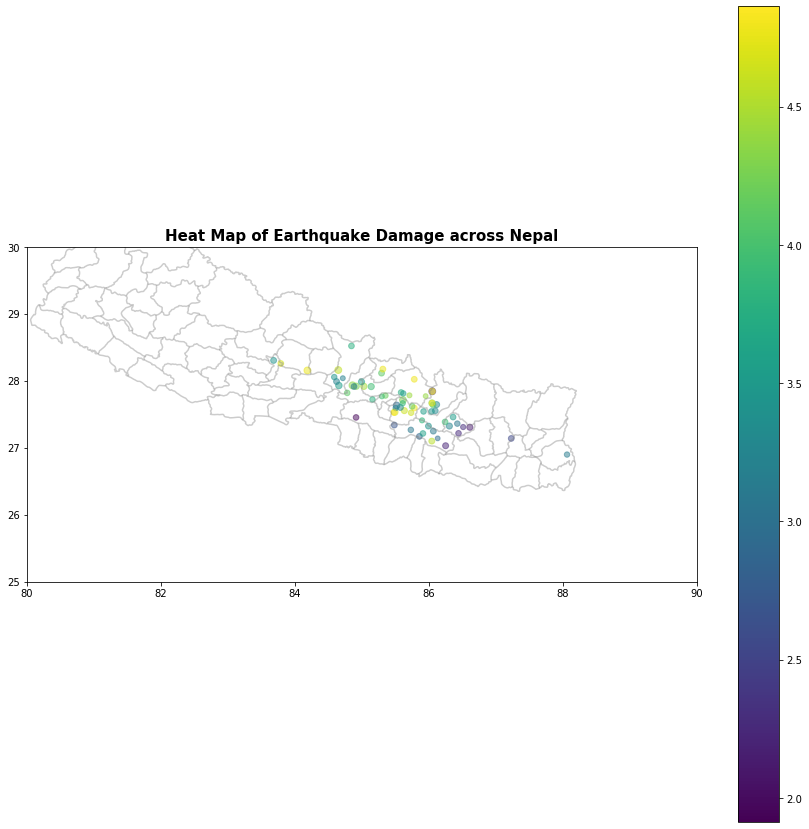

In [65]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
nepal.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(markersize = geo_df["size"]**0.4,column='damage_grade_int',ax=ax,alpha=0.5, legend=True)
# add title to graph
plt.title('Heat Map of Earthquake Damage across Nepal', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(80,90)
plt.ylim(25,30)
# show map
plt.show()

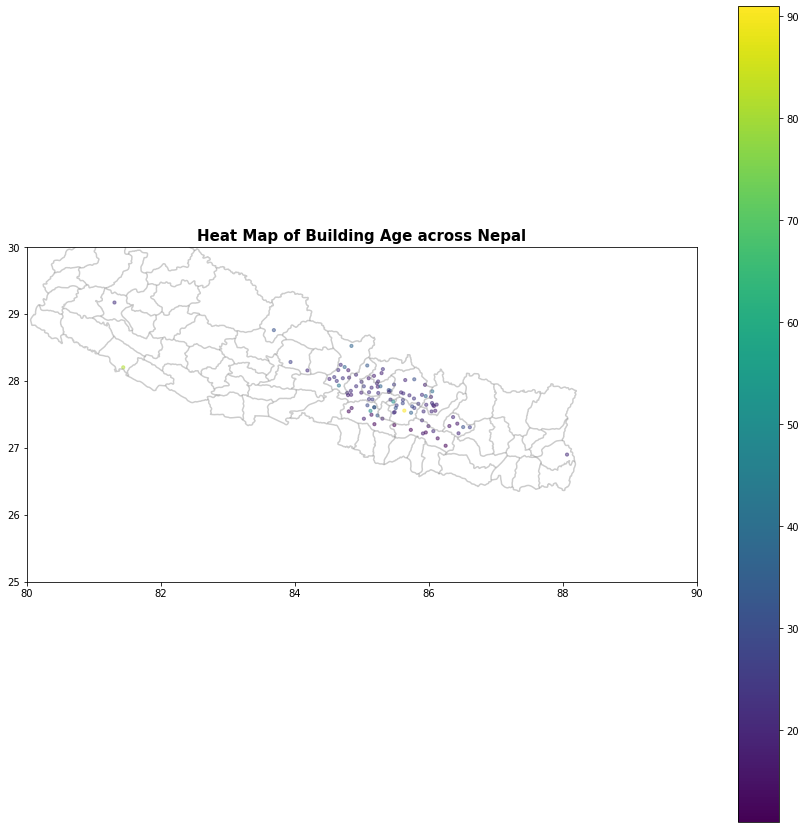

In [47]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
nepal.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='age_building',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('Heat Map of Building Age across Nepal', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(80,90)
plt.ylim(25,30)
# show map
plt.show()

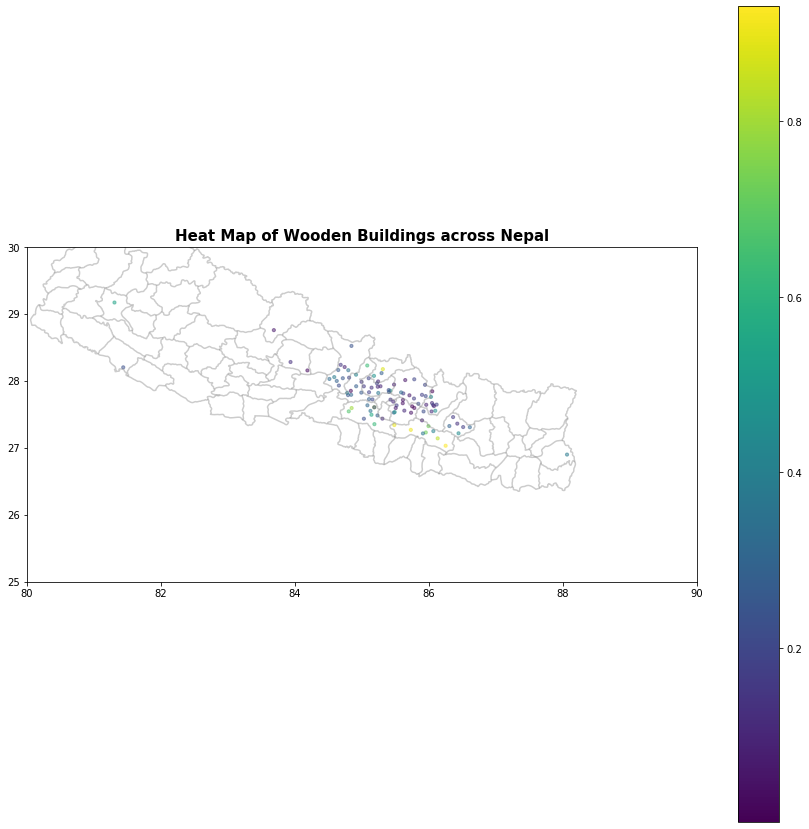

In [48]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
nepal.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='has_wood_superstructure',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('Heat Map of Wooden Buildings across Nepal', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(80,90)
plt.ylim(25,30)
# show map
plt.show()